# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 6. Working with strings

## Getting and inspecting the data

### Downloading data from the web

In [1]:
import Downloads
Downloads.download("https://raw.githubusercontent.com/sidooms/MovieTweetings/" *
                   "44c525d0c766944910686c60697203cda39305d6/snapshots/10K/movies.dat",
                   "movies.dat")

"movies.dat"

### Constructing strings

#### Interpolation

In [2]:
x = 10

10

In [3]:
"I have $x apples"

"I have 10 apples"

In [4]:
"I have $(2 * x) apples"

"I have 20 apples"

#### Escape sequences

In [5]:
"I have \$100."

"I have \$100."

In [6]:
"I have $100."

LoadError: syntax: invalid interpolation syntax: "$1"

In [7]:
Downloads.download("https://raw.githubusercontent.com/sidooms/MovieTweetings/\
                    44c525d0c766944910686c60697203cda39305d6/snapshots/10K/movies.dat",
                   "movies.dat")

"movies.dat"

In [8]:
"a\
 b\
 c"

"abc"

#### Raw strings

In [9]:
"C:\my_folder\my_file.txt"

LoadError: syntax: invalid escape sequence

In [10]:
raw"C:\my_folder\my_file.txt"

"C:\\my_folder\\my_file.txt"

In [11]:
print(raw"C:\my_folder\my_file.txt")

C:\my_folder\my_file.txt

### Reading the text file

In [12]:
isfile("movies.dat")

true

In [13]:
movies = readlines("movies.dat")

3096-element Vector{String}:
 "0002844::Fantômas - À l'ombre de la guillotine (1913)::Crime|Drama"
 "0007264::The Rink (1916)::Comedy|Short"
 "0008133::The Immigrant (1917)::Short|Comedy|Drama|Romance"
 "0012349::The Kid (1921)::Comedy|Drama|Family"
 "0013427::Nanook of the North (1922)::Documentary"
 "0014142::The Hunchback of Notre Dame (1923)::Drama|Romance"
 "0014538::Three Ages (1923)::Comedy"
 "0014872::Entr'acte (1924)::Short"
 "0015163::The Navigator (1924)::Action|Comedy"
 "0015324::Sherlock Jr. (1924)::Comedy|Fantasy"
 "0015400::The Thief of Bagdad (1924)::Adventure|Family|Fantasy|Romance"
 "0017925::The General (1926)::Action|Adventure|Comedy|Romance|War"
 "0018773::The Circus (1928)::Comedy|Romance"
 ⋮
 "2638984::Teal Diva (2012)::Documentary|Short"
 "2645104::Romantik komedi 2: Bekarliga veda (2013)::Comedy"
 "2645164::The Hardy Bucks Movie (2013)::Comedy"
 "2646378::The Frankenstein Theory (2013)::Horror|Sci-Fi"
 "2649128::Metro (2013)::Thriller"
 "2670226::Jîn (2013)::Dr

### Splitting strings

In [14]:
movie1 = first(movies)

"0002844::Fantômas - À l'ombre de la guillotine (1913)::Crime|Drama"

In [15]:
movie1_parts = split(movie1, "::")

3-element Vector{SubString{String}}:
 "0002844"
 "Fantômas - À l'ombre de la guillotine (1913)"
 "Crime|Drama"

### String types

In [16]:
supertype(String)

AbstractString

In [17]:
supertype(SubString{String})

AbstractString

In [18]:
suffix_bang(s::AbstractString) = s * "!"

suffix_bang (generic function with 1 method)

### Working with strings using regular expressions

In [19]:
movie1_parts[2]

"Fantômas - À l'ombre de la guillotine (1913)"

In [20]:
rx = r"(.+) \((\d{4})\)$"

r"(.+) \((\d{4})\)$"

In [21]:
m = match(rx, movie1_parts[2])

RegexMatch("Fantômas - À l'ombre de la guillotine (1913)", 1="Fantômas - À l'ombre de la guillotine", 2="1913")

In [22]:
m[1]

"Fantômas - À l'ombre de la guillotine"

In [23]:
m[2]

"1913"

In [24]:
parse(Int, m[2])

1913

In [25]:
function parseline(line::AbstractString)
    parts = split(line, "::")
    m = match(r"(.+) \((\d{4})\)", parts[2])
    return (id=parts[1],
    name=m[1],
    year=parse(Int, m[2]),
    genres=split(parts[3], "|"))
end

parseline (generic function with 1 method)

In [26]:
record1 = parseline(movie1)

(id = "0002844", name = "Fantômas - À l'ombre de la guillotine", year = 1913, genres = SubString{String}["Crime", "Drama"])

### Extracting a subset from a string with indexing

In [27]:
codeunits("a")

1-element Base.CodeUnits{UInt8, String}:
 0x61

In [28]:
codeunits("ε")

2-element Base.CodeUnits{UInt8, String}:
 0xce
 0xb5

In [29]:
codeunits("∀")

3-element Base.CodeUnits{UInt8, String}:
 0xe2
 0x88
 0x80

#### Character vs. byte indexing

In [30]:
word = first(record1.name, 8)

"Fantômas"

In [31]:
record1.name[1:8]

"Fantôma"

In [32]:
for i in eachindex(word)
    println(i, ": ", word[i])
end

1: F
2: a
3: n
4: t
5: ô
7: m
8: a
9: s


In [33]:
codeunits("ô")

2-element Base.CodeUnits{UInt8, String}:
 0xc3
 0xb4

In [34]:
codeunits("Fantômas")

9-element Base.CodeUnits{UInt8, String}:
 0x46
 0x61
 0x6e
 0x74
 0xc3
 0xb4
 0x6d
 0x61
 0x73

#### ASCII strings

In [35]:
isascii("Hello world!")

true

In [36]:
isascii("∀ x: x≥0")

false

#### The `Char` type

In [37]:
word[1]

'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)

In [38]:
word[5]

'ô': Unicode U+00F4 (category Ll: Letter, lowercase)

## Analyzing genres frequency in movies.dat

In [39]:
### Common movie genres

In [40]:
records = parseline.(movies)

3096-element Vector{NamedTuple{(:id, :name, :year, :genres), Tuple{SubString{String}, SubString{String}, Int64, Vector{SubString{String}}}}}:
 (id = "0002844", name = "Fantômas - À l'ombre de la guillotine", year = 1913, genres = ["Crime", "Drama"])
 (id = "0007264", name = "The Rink", year = 1916, genres = ["Comedy", "Short"])
 (id = "0008133", name = "The Immigrant", year = 1917, genres = ["Short", "Comedy", "Drama", "Romance"])
 (id = "0012349", name = "The Kid", year = 1921, genres = ["Comedy", "Drama", "Family"])
 (id = "0013427", name = "Nanook of the North", year = 1922, genres = ["Documentary"])
 (id = "0014142", name = "The Hunchback of Notre Dame", year = 1923, genres = ["Drama", "Romance"])
 (id = "0014538", name = "Three Ages", year = 1923, genres = ["Comedy"])
 (id = "0014872", name = "Entr'acte", year = 1924, genres = ["Short"])
 (id = "0015163", name = "The Navigator", year = 1924, genres = ["Action", "Comedy"])
 (id = "0015324", name = "Sherlock Jr.", year = 1924, genre

In [41]:
genres = String[]

String[]

In [42]:
for record in records
    append!(genres, record.genres)
end

In [43]:
genres

8121-element Vector{String}:
 "Crime"
 "Drama"
 "Comedy"
 "Short"
 "Short"
 "Comedy"
 "Drama"
 "Romance"
 "Comedy"
 "Drama"
 "Family"
 "Documentary"
 "Drama"
 ⋮
 "Short"
 "Comedy"
 "Drama"
 "Family"
 "Short"
 "Comedy"
 "Short"
 "Drama"
 "Family"
 "Short"
 "Drama"
 "Short"

In [44]:
using FreqTables
table = freqtable(genres)

25-element Named Vector{Int64}
Dim1        │ 
────────────┼─────
            │   14
Action      │  635
Adventure   │  443
Animation   │  137
Biography   │  166
Comedy      │ 1001
Crime       │  550
Documentary │  126
Drama       │ 1583
Family      │  222
Fantasy     │  278
⋮                ⋮
Music       │   83
Musical     │   58
Mystery     │  294
News        │    4
Romance     │  558
Sci-Fi      │  305
Short       │   46
Sport       │   84
Thriller    │  910
War         │  126
Western     │   35

In [45]:
sort!(table)

25-element Named Vector{Int64}
Dim1        │ 
────────────┼─────
News        │    4
Film-Noir   │   13
            │   14
Western     │   35
Short       │   46
Musical     │   58
Music       │   83
Sport       │   84
History     │  125
Documentary │  126
War         │  126
⋮                ⋮
Fantasy     │  278
Mystery     │  294
Sci-Fi      │  305
Horror      │  325
Adventure   │  443
Crime       │  550
Romance     │  558
Action      │  635
Thriller    │  910
Comedy      │ 1001
Drama       │ 1583

### Unserstanding genre popularity evolution during the years

In [46]:
years = [record.year for record in records]

3096-element Vector{Int64}:
 1913
 1916
 1917
 1921
 1922
 1923
 1923
 1924
 1924
 1924
 1924
 1926
 1928
    ⋮
 2012
 2013
 2013
 2013
 2013
 2013
 2010
 2012
 2013
 2013
 2013
 2013

In [47]:
has_drama = ["Drama" in record.genres for record in records]

3096-element Vector{Bool}:
 1
 0
 1
 1
 0
 1
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 1
 0
 1
 0
 1
 1
 0

In [48]:
drama_prop = proptable(years, has_drama; margins=1)

93×2 Named Matrix{Float64}
Dim1 ╲ Dim2 │    false      true
────────────┼───────────────────
1913        │      0.0       1.0
1916        │      1.0       0.0
1917        │      0.0       1.0
1921        │      0.0       1.0
1922        │      1.0       0.0
1923        │      0.5       0.5
1924        │      1.0       0.0
1926        │      1.0       0.0
1928        │      1.0       0.0
1929        │      1.0       0.0
1930        │ 0.333333  0.666667
⋮                    ⋮         ⋮
2003        │ 0.533333  0.466667
2004        │ 0.438095  0.561905
2005        │ 0.387931  0.612069
2006        │ 0.426357  0.573643
2007        │ 0.492063  0.507937
2008        │ 0.424051  0.575949
2009        │ 0.432432  0.567568
2010        │ 0.451754  0.548246
2011        │ 0.484472  0.515528
2012        │ 0.577017  0.422983
2013        │ 0.623529  0.376471

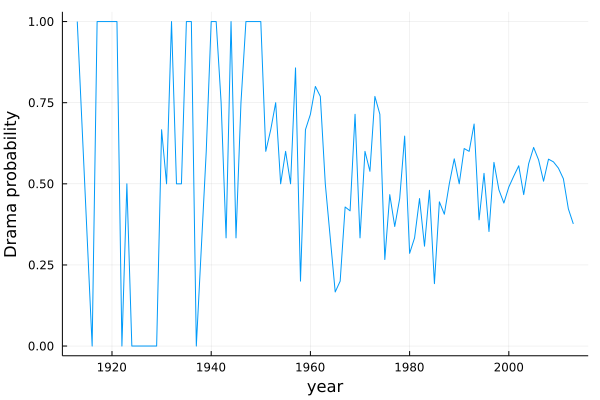

In [49]:
using Plots
plot(names(drama_prop, 1), drama_prop[:, 2]; legend=false, xlabel="year", ylabel="Drama probability")

## Introducing symbols

### Creating symbols

In [50]:
s1 = Symbol("x")

:x

In [51]:
s2 = Symbol("hello world!")

Symbol("hello world!")

In [52]:
s3 = Symbol("x", 1)

:x1

In [53]:
typeof(s1)

Symbol

In [54]:
typeof(s2)

Symbol

In [55]:
typeof(s3)

Symbol

In [56]:
Symbol("1")

Symbol("1")

In [57]:
:x

:x

In [58]:
:x1

:x1

In [59]:
:hello world

LoadError: syntax: extra token "world" after end of expression

In [60]:
:1

1

### Using symbols

In [61]:
supertype(Symbol)

Any

In [62]:
:x == :x

true

In [63]:
:x == :y

false

In [64]:
using BenchmarkTools
str = string.("x", 1:10^6)

1000000-element Vector{String}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"
 "x7"
 "x8"
 "x9"
 "x10"
 "x11"
 "x12"
 "x13"
 ⋮
 "x999989"
 "x999990"
 "x999991"
 "x999992"
 "x999993"
 "x999994"
 "x999995"
 "x999996"
 "x999997"
 "x999998"
 "x999999"
 "x1000000"

In [65]:
symb = Symbol.(str)

1000000-element Vector{Symbol}:
 :x1
 :x2
 :x3
 :x4
 :x5
 :x6
 :x7
 :x8
 :x9
 :x10
 :x11
 :x12
 :x13
 ⋮
 :x999989
 :x999990
 :x999991
 :x999992
 :x999993
 :x999994
 :x999995
 :x999996
 :x999997
 :x999998
 :x999999
 :x1000000

In [66]:
@btime "x" in $str;

  5.460 ms (0 allocations: 0 bytes)


In [67]:
@btime :x in $symb;

  429.500 μs (0 allocations: 0 bytes)


## Using fixed-width string types to improve performance

### Construction of fixed-width strings

In [68]:
using InlineStrings
s1 = InlineString("x")

"x"

In [69]:
typeof(s1)

String1

In [70]:
s2 = InlineString("∀")

"∀"

In [71]:
typeof(s2)

String3

In [72]:
sv = inlinestrings(["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"])

9-element Vector{String7}:
 "The"
 "quick"
 "brown"
 "fox"
 "jumps"
 "over"
 "the"
 "lazy"
 "dog"

### Performance of fixed-width strings

In [73]:
using Random
using BenchmarkTools
Random.seed!(1234);
s1 = [randstring(3) for i in 1:10^6]

1000000-element Vector{String}:
 "KYD"
 "tLO"
 "xnU"
 "kZj"
 "0CR"
 "gxe"
 "zk6"
 "UZF"
 "cE7"
 "bfl"
 "aM8"
 "wZg"
 "Z4h"
 ⋮
 "ddC"
 "WFn"
 "PKX"
 "5nN"
 "dFH"
 "yGp"
 "SLX"
 "jua"
 "sfK"
 "Tt6"
 "19y"
 "GQ7"

In [74]:
s2 = inlinestrings(s1)

1000000-element Vector{String3}:
 "KYD"
 "tLO"
 "xnU"
 "kZj"
 "0CR"
 "gxe"
 "zk6"
 "UZF"
 "cE7"
 "bfl"
 "aM8"
 "wZg"
 "Z4h"
 ⋮
 "ddC"
 "WFn"
 "PKX"
 "5nN"
 "dFH"
 "yGp"
 "SLX"
 "jua"
 "sfK"
 "Tt6"
 "19y"
 "GQ7"

In [75]:
Base.summarysize(s1)

19000040

In [76]:
Base.summarysize(s2)

4000040

In [77]:
@btime sort($s1);

  250.935 ms (4 allocations: 11.44 MiB)


In [78]:
@btime sort($s2);

  6.264 ms (6 allocations: 7.65 MiB)


## Compressing vectors of strings with PooledArrays.jl

### Creating a file containing flower names

In [79]:
open("iris.txt", "w") do io
    for i in 1:10^6
        println(io, "Iris setosa")
        println(io, "Iris virginica")
        println(io, "Iris versicolor")
    end
end

In [80]:
isfile("iris.txt")

true

### Reading in the data to a vector and compressing it

In [81]:
uncompressed = readlines("iris.txt")

3000000-element Vector{String}:
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 ⋮
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"

In [82]:
using PooledArrays
compressed = PooledArray(uncompressed)

3000000-element PooledVector{String, UInt32, Vector{UInt32}}:
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 ⋮
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"

### Memory footprint of PooledArrays

In [83]:
Base.summarysize(uncompressed)

88000040

In [84]:
Base.summarysize(compressed)

12000600

In [85]:
v1 = string.("x", 1:10^6)

1000000-element Vector{String}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"
 "x7"
 "x8"
 "x9"
 "x10"
 "x11"
 "x12"
 "x13"
 ⋮
 "x999989"
 "x999990"
 "x999991"
 "x999992"
 "x999993"
 "x999994"
 "x999995"
 "x999996"
 "x999997"
 "x999998"
 "x999999"
 "x1000000"

In [86]:
v2 = PooledArray(v1)

1000000-element PooledVector{String, UInt32, Vector{UInt32}}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"
 "x7"
 "x8"
 "x9"
 "x10"
 "x11"
 "x12"
 "x13"
 ⋮
 "x999989"
 "x999990"
 "x999991"
 "x999992"
 "x999993"
 "x999994"
 "x999995"
 "x999996"
 "x999997"
 "x999998"
 "x999999"
 "x1000000"

In [87]:
Base.summarysize(v1)

22888936

In [88]:
Base.summarysize(v2)

54152176